<p><strong>Analytical Context.</strong> You are given a folder, named <code>files</code> with <em>raw</em> data. This data contains quite a large number of variables and it is in a fairly disorganized state. In addition, one of the datasets contains very poor documentation, segmented into several datasets. Your objective will be to:</p>
<ol>
<li>Extract and clean the relevant data. You will have to manipulate several datasets to obtain useful information for the case. </li>
<li>Conduct Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypotheses and study the relationship between various indicators related to airline crash.</li>
</ol>
<p>Additionally, the client has some broad questions they would like to answer:<br />
1. How many planes crash yearly?<br />
2. How many people are on board?<br />
3. How many survivors were recorded?<br />
4. Information on number of crashes by operator, type of aircraft? </p>

<p> From these analyses, we could uncover trends and behaviours that are peculiar with these crashes and hence device means to fight them </p>


In [4]:
# import the libraries and data
import pandas as pd
import seaborn as sns
import numpy as np
import re
import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, download_plotlyjs, iplot, plot
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load dataset


In [5]:
us_code = pd.read_csv('./Data/USState_Codes.csv')
region_url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'
continent_url = 'https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv'
countries_code = pd.read_csv(region_url)
continent = pd.read_csv(continent_url)

In [6]:
pop_data = pd.read_csv('./Data/API_SP.POP.TOTL_DS2_en_csv_v2_2763937.csv', skiprows=3)

In [7]:
airline_data = pd.read_csv('./Data/API_IS.AIR.PSGR_DS2_en_csv_v2_2763981.csv',skiprows=3)
aircrash_data = pd.read_csv('./Data/AviationData.csv',encoding='ISO-8859-1')

In [8]:
aircrash_data.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


In [9]:
airline_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,223502.00,2.742800e+05,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,3.583868e+07,3.511246e+07,3.635076e+07,39154692.0,41553429.0,45423814.08,5.261396e+07,5.433525e+07,NaN,NaN
2,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,1.737962e+06,2.044188e+06,2.209428e+06,1929907.0,1917924.0,1647425.00,1.125367e+06,1.066747e+06,NaN,NaN
3,Africa Western and Central,AFW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.570162e+06,8.677884e+06,8.030237e+06,8696300.0,8129874.0,8837017.00,1.233777e+07,1.134659e+07,NaN,NaN
4,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,1.132424e+06,1.321872e+06,1.409952e+06,1244491.0,1482546.0,1375523.00,1.516628e+06,1.436959e+06,NaN,NaN


In [10]:
us_code.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [11]:
continent.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [12]:
columns = [col.lower().replace('.', '_') for col in aircrash_data.columns]
aircrash_data.columns = columns

In [13]:
columns = [col.lower().replace(' ', '_') for col in airline_data.columns]
airline_data.columns = columns

In [14]:
aircrash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                85976 non-null  object 
 1   investigation_type      85963 non-null  object 
 2   accident_number         85976 non-null  object 
 3   event_date              85976 non-null  object 
 4   location                85898 non-null  object 
 5   country                 85469 non-null  object 
 6   latitude                31587 non-null  float64
 7   longitude               31578 non-null  float64
 8   airport_code            48612 non-null  object 
 9   airport_name            51298 non-null  object 
 10  injury_severity         85842 non-null  object 
 11  aircraft_damage         83047 non-null  object 
 12  aircraft_category       29226 non-null  object 
 13  registration_number     81756 non-null  object 
 14  make                    85908 non-null

In [15]:
aircrash_data.describe()

,latitude,longitude,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,31587.000000,3.157800e+04,80399.000000,58158.000000,55466.000000,56695.000000,71092.000000
mean,37.455487,-2.655576e+03,1.147564,0.847037,0.330833,0.521104,6.131393
std,12.519763,4.553227e+05,0.446792,6.291200,1.367596,2.878535,30.180326
min,-78.016945,-8.091184e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.269167,-1.147209e+02,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.091111,-9.431139e+01,1.000000,0.000000,0.000000,0.000000,1.000000
75%,42.505139,-8.164129e+01,1.000000,1.000000,0.000000,1.000000,2.000000
max,89.218056,4.358333e+02,8.000000,349.000000,111.000000,380.000000,699.000000


In [16]:
def missing_features(df):
    mask = df.isnull() 
    total = mask.sum()
    percent = 100*mask.mean()
    missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['count_missing', 'perc_missing'])
    
    ### get names of indexes for which count_missing value is 0
    index_names = missing_data[missing_data['count_missing']== 0].index 
    missing_data.drop(index_names, inplace = True)
    
    missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
    return missing_data


In [17]:
# convert date from object to datetime
aircrash_data['event_date'] = pd.to_datetime(aircrash_data['event_date'])

In [18]:
# generate week_number of the event
def week_no(date_val):
    day_of_month = date_val.day
    week_number = (day_of_month - 1)// 7 + 1
    return week_number
my_weeks = []
for date in aircrash_data['event_date']:
    my_weeks.append(week_no(date))

In [19]:
# generate event month, day, year and week from the event_date
aircrash_data['event_month'] = aircrash_data['event_date'].dt.month_name()
aircrash_data['event_day'] = aircrash_data['event_date'].dt.day_name()
aircrash_data['event_year'] = aircrash_data['event_date'].dt.year
aircrash_data['event_week_number'] = my_weeks

In [20]:
# drop the event_date
aircrash_data.drop('event_date', axis= 1,inplace = True)

In [21]:
# describe the event year
aircrash_data.event_year.describe()

count    85976.000000
mean      1998.421746
std         11.297893
min       1948.000000
25%       1988.000000
50%       1997.000000
75%       2008.000000
max       2021.000000
Name: event_year, dtype: float64

In [22]:
missing_features(aircrash_data)

,count_missing,perc_missing
air_carrier,81385,94.660138
schedule,73797,85.834419
far_description,57047,66.352238
aircraft_category,56750,66.006793
longitude,54398,63.271145
latitude,54389,63.260677
airport_code,37364,43.458640
airport_name,34678,40.334512
total_serious_injuries,30510,35.486647
total_minor_injuries,29281,34.057179


In [23]:
for col in aircrash_data.columns:
    if aircrash_data[col].dtypes== 'O':
        print(f'Feature {col} has {aircrash_data[col].nunique()} unique variables')
        print('-'*100)
        if aircrash_data[col].nunique() < 100:
            print(aircrash_data[col].value_counts().sort_values(ascending = False))
            print('-'*100)

Feature event_id has 84389 unique variables
----------------------------------------------------------------------------------------------------
Feature investigation_type has 2 unique variables
----------------------------------------------------------------------------------------------------
Accident    82286
Incident     3677
Name: investigation_type, dtype: int64
----------------------------------------------------------------------------------------------------
Feature accident_number has 85975 unique variables
----------------------------------------------------------------------------------------------------
Feature location has 23837 unique variables
----------------------------------------------------------------------------------------------------
Feature country has 185 unique variables
----------------------------------------------------------------------------------------------------
Feature airport_code has 10106 unique variables
-----------------------------------------

In [24]:
# drop attrubutes with percent_missing greater that 60% and high unique values 
features_to_be_removed = ['event_id', 'accident_number',
        'latitude', 'longitude', 'airport_code', 'airport_name', 'aircraft_category',
       'registration_number',
       'number_of_engines','far_description', 'schedule',
       'air_carrier',
       'publication_date','model', 'amateur_built']

In [25]:
aircrash_data.drop(features_to_be_removed, axis = 1,inplace=True)

In [26]:
aircrash_data.columns

Index(['investigation_type', 'location', 'country', 'injury_severity',
       'aircraft_damage', 'make', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'report_status', 'event_month', 'event_day',
       'event_year', 'event_week_number'],
      dtype='object')

In [27]:
## fill the null values of injured and uninjured passengers with 0
aircrash_data = aircrash_data.fillna({'total_fatal_injuries':0, 'total_serious_injuries':0, 'total_minor_injuries':0,'total_uninjured':0})
missing_features(aircrash_data)

,count_missing,perc_missing
broad_phase_of_flight,7594,8.832697
purpose_of_flight,5392,6.271518
engine_type,5104,5.936540
weather_condition,3672,4.270959
aircraft_damage,2929,3.406765
report_status,993,1.154973
country,507,0.589699
injury_severity,134,0.155857
location,78,0.090723
make,68,0.079092


In [28]:
aircrash_data['total_injured'] = aircrash_data[['total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries']].to_numpy().sum(axis = 1)

aircrash_data['total_aboard'] = aircrash_data[['total_fatal_injuries', 'total_uninjured',
       'total_serious_injuries', 'total_minor_injuries']].to_numpy().sum(axis = 1)

In [29]:
## fill null value with Unknown
aircrash_data.broad_phase_of_flight.value_counts()
aircrash_data.fillna({'broad_phase_of_flight': 'Unknown'}, inplace=True)
aircrash_data.broad_phase_of_flight.value_counts()

Landing        20857
Takeoff        16428
Cruise         11227
Maneuvering    10428
Unknown         8405
Approach        8223
Taxi            2512
Climb           2379
Descent         2320
Go-around       1705
Standing        1324
Other            168
Name: broad_phase_of_flight, dtype: int64

In [30]:
# replace 'Others' with purpose_of_flight instances value_count less than 100
# fill null value with Unknown
purpose_of_flight = aircrash_data.groupby('purpose_of_flight')['purpose_of_flight'].agg('count').sort_values(ascending = False)
purpose_of_flight_less_than_100 = purpose_of_flight[purpose_of_flight < 100]
aircrash_data.purpose_of_flight = aircrash_data.purpose_of_flight.apply(lambda x: 'Others' if x in purpose_of_flight_less_than_100 else x)
aircrash_data.fillna({'purpose_of_flight': 'Unknown'}, inplace=True)
aircrash_data.purpose_of_flight.value_counts()

Personal                     47930
Unknown                      12185
Instructional                10275
Aerial Application            4607
Business                      3978
Positioning                   1594
Other Work Use                1201
Ferry                          807
Aerial Observation             758
Public Aircraft                714
Executive/corporate            536
Others                         454
Flight Test                    381
Skydiving                      177
Air Race/show                  169
External Load                  108
Public Aircraft - Federal      102
Name: purpose_of_flight, dtype: int64

In [31]:
# fillna in weather_condtion with UNK and replace Unk with UNK
'''
IMC  
 -Instrument Meteoroligical condition - a flight category that describes weather conditions that require pilots to fly
  reference to instruments and therefore instrument flight rules
VMC
  -An aviation flight category in which visual flight rules (VFR) flight is permitted, that is the conditions in which
   pilots have sufficient visibility to fly the aircraft maintaining visual separation from terrain and other aircraft
UNK
   Unknown
'''

aircrash_data.fillna({'weather_condition': 'UNK'}, inplace=True)
aircrash_data['weather_condition'] = np.where(aircrash_data['weather_condition'] == 'Unk',
                                              'UNK', aircrash_data['weather_condition'] )
aircrash_data.weather_condition.value_counts()

VMC    75326
IMC     5900
UNK     4750
Name: weather_condition, dtype: int64

In [32]:
# fillna in injury_severity with Unavailable
# change Minor and Siruose to Non-Fatal
# change Incident which total_fatal_injuries >= 1 Fatal, else Non-Fatal
aircrash_data.injury_severity.value_counts().head(50)
aircrash_data = aircrash_data.fillna({'injury_severity': 'Unavailable'})
aircrash_data['injury_severity'] = np.where(((aircrash_data['injury_severity']== 'Minor') | (aircrash_data['injury_severity']== 'Siruose')), 
                                            'Non-Fatal', aircrash_data['injury_severity'])
aircrash_data['injury_severity'] = np.where(((aircrash_data['injury_severity']== 'Incident') & (aircrash_data['total_fatal_injuries']>= 1)), 'Fatal', aircrash_data['injury_severity'])
aircrash_data['injury_severity'] = np.where(aircrash_data['injury_severity']== 'Incident', 'Non-Fatal', aircrash_data['injury_severity'])
aircrash_data['injury_severity'] = np.where(((aircrash_data['injury_severity']== 'Non-Fatal') | (aircrash_data['injury_severity']== 'Unavailable')), 
                                            aircrash_data['injury_severity'],'Fatal' )
aircrash_data.injury_severity.value_counts().head(50)

Non-Fatal      68241
Fatal          17294
Unavailable      441
Name: injury_severity, dtype: int64

In [33]:
# replace Others with engine_type instances value_count less than 100
# fill null value with Mode
engine_type = aircrash_data.groupby('engine_type')['engine_type'].agg('count').sort_values(ascending = False)
engine_type_less_than_100 = engine_type[engine_type < 100]
aircrash_data.engine_type = aircrash_data.engine_type.apply(lambda x: 'Others' if x in engine_type_less_than_100 else x)
aircrash_data = aircrash_data.fillna({'engine_type': aircrash_data['engine_type'].mode().iloc[0]})
aircrash_data.engine_type.value_counts()

Reciprocating    73768
Turbo Shaft       3541
Turbo Prop        3345
Turbo Fan         2463
Unknown           2057
Turbo Jet          707
Others              95
Name: engine_type, dtype: int64

In [34]:
aircrash_data.aircraft_damage.value_counts()
aircraft_damage_null = aircrash_data[aircrash_data.aircraft_damage.isnull()]
aircraft_damage_null[aircraft_damage_null.injury_severity == 'Fatal'][['total_fatal_injuries', 'total_uninjured',
       'total_serious_injuries', 'total_minor_injuries']]
aircrash_data[(aircrash_data.injury_severity == 'Fatal') & (aircrash_data.aircraft_damage == 'Substantial') ][['total_fatal_injuries', 'total_uninjured',
       'total_serious_injuries', 'total_minor_injuries']].describe()

,total_fatal_injuries,total_uninjured,total_serious_injuries,total_minor_injuries
count,4616.000000,4616.000000,4616.000000,4616.000000
mean,1.655763,0.464255,0.318458,0.259315
std,1.677588,7.181626,1.540206,3.629857
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000
max,77.000000,309.000000,66.000000,161.000000


In [35]:
# fillna where aircraft_damage is Non-Fatal with Substantial else Destroyed
aircrash_data.loc[(aircrash_data['injury_severity'] == 'Fatal') & aircrash_data['aircraft_damage'].isnull(),'aircraft_damage']= 'Destroyed'
aircrash_data.loc[(aircrash_data['injury_severity'] == 'Non-Fatal') & aircrash_data['aircraft_damage'].isnull(), 'aircraft_damage']= 'Substantial'

In [36]:
aircrash_data.aircraft_damage.value_counts()

Substantial    64667
Destroyed      18479
Minor           2758
Name: aircraft_damage, dtype: int64

In [37]:
# fillna with mode since Probable Cause is the mode
aircrash_data = aircrash_data.fillna({'report_status': aircrash_data['report_status'].mode().iloc[0]})
aircrash_data.report_status.value_counts()

Probable Cause    78738
Foreign            5150
Preliminary        1315
Factual             773
Name: report_status, dtype: int64

In [38]:
missing_features(aircrash_data)

,count_missing,perc_missing
country,507,0.589699
location,78,0.090723
aircraft_damage,72,0.083744
make,68,0.079092
investigation_type,13,0.015120


In [39]:
index = missing_features(aircrash_data).index
aircrash_data = aircrash_data.dropna(axis = 0 , subset=list(index))

In [40]:
aircrash_data.drop_duplicates(inplace = True)

In [41]:
aircrash_data.shape

(85128, 21)

In [42]:
aircrash_data.reset_index(drop=True).head()

,investigation_type,location,country,injury_severity,aircraft_damage,make,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,...,total_uninjured,weather_condition,broad_phase_of_flight,report_status,event_month,event_day,event_year,event_week_number,total_injured,total_aboard
0,Accident,"JANESVILLE, WI",United States,Fatal,Substantial,Velocity,Reciprocating,Ferry,2.0,0.0,...,0.0,VMC,Unknown,Probable Cause,February,Tuesday,2021,3,2.0,2.0
1,Accident,"St Thomas, CB",United States,Fatal,Destroyed,Bell,Reciprocating,Others,4.0,0.0,...,0.0,VMC,Unknown,Probable Cause,February,Monday,2021,3,4.0,4.0
2,Accident,"TYONEK, AK",United States,Non-Fatal,Substantial,Maule,Reciprocating,Personal,0.0,0.0,...,0.0,UNK,Unknown,Probable Cause,February,Saturday,2021,2,2.0,2.0
3,Accident,"PRAIRIE DU SAC, WI",United States,Non-Fatal,Substantial,Cessna,Reciprocating,Instructional,0.0,0.0,...,1.0,VMC,Unknown,Probable Cause,February,Friday,2021,2,0.0,1.0
4,Accident,"LAKE PLACID, FL",United States,Non-Fatal,Substantial,Piper,Reciprocating,Personal,0.0,0.0,...,0.0,UNK,Unknown,Probable Cause,February,Wednesday,2021,2,1.0,1.0


In [43]:
aircrash_data.country.value_counts().head(50)

United States         79942
Canada                  313
Mexico                  301
Brazil                  297
United Kingdom          275
Australia               274
Bahamas                 208
France                  204
Germany                 188
Colombia                159
Spain                   142
Japan                   107
Italy                   104
Venezuela                98
Indonesia                96
South Africa             95
Argentina                92
Peru                     87
Ecuador                  84
Russia                   83
India                    79
Switzerland              79
Ireland                  67
Dominican Republic       63
Guatemala                59
China                    57
New Zealand              54
Austria                  52
Chile                    50
Sweden                   49
Netherlands              41
Korea, Republic Of       40
Bolivia                  39
Costa Rica               39
Portugal                 35
Panama              

In [44]:
aircrash_data.country.value_counts().tail(60)

Maldives                                  3
Bahrain                                   3
Botswana                                  3
Marshall Islands                          3
St Kitts And Nevis                        3
Slovakia                                  3
Malta                                     3
Madagascar                                3
Malawi                                    3
Gabon                                     3
Qatar                                     3
Bermuda                                   3
Trinidad And Tobago                       3
Senegal                                   3
Kiribati                                  2
St Vincent And The Grenadines             2
Mauritius                                 2
Solomon Islands                           2
Aruba                                     2
Reunion                                   2
Macedonia                                 2
Central African Republic                  2
Bosnia And Herzegovina          

In [45]:
airline_data.columns

Index(['country_name', 'country_code', 'indicator_name', 'indicator_code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'unnamed:_65'],
      dtype='object')

In [46]:
airline_data = airline_data.loc[:, ~airline_data.columns.str.contains('^unnamed')]
id_variables = ['indicator_name', 'country_name', 'country_code','indicator_code']
airline_data = pd.melt(airline_data, id_vars= id_variables, var_name='event_year', value_name='total_passengers')
airline_data.head()

,indicator_name,country_name,country_code,indicator_code,event_year,total_passengers
0,"Air transport, passengers carried",Aruba,ABW,IS.AIR.PSGR,1960,NaN
1,"Air transport, passengers carried",Africa Eastern and Southern,AFE,IS.AIR.PSGR,1960,NaN
2,"Air transport, passengers carried",Afghanistan,AFG,IS.AIR.PSGR,1960,NaN
3,"Air transport, passengers carried",Africa Western and Central,AFW,IS.AIR.PSGR,1960,NaN
4,"Air transport, passengers carried",Angola,AGO,IS.AIR.PSGR,1960,NaN


In [47]:
airline_data = airline_data[airline_data.total_passengers.notnull()]

In [48]:
 aircrash_data.set_index('country')

,investigation_type,location,injury_severity,aircraft_damage,make,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,event_month,event_day,event_year,event_week_number,total_injured,total_aboard
country,,,,,,,,,,,,,,,,,,,,
United States,Accident,"JANESVILLE, WI",Fatal,Substantial,Velocity,Reciprocating,Ferry,2.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,February,Tuesday,2021,3,2.0,2.0
United States,Accident,"St Thomas, CB",Fatal,Destroyed,Bell,Reciprocating,Others,4.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,February,Monday,2021,3,4.0,4.0
United States,Accident,"TYONEK, AK",Non-Fatal,Substantial,Maule,Reciprocating,Personal,0.0,0.0,2.0,0.0,UNK,Unknown,Probable Cause,February,Saturday,2021,2,2.0,2.0
United States,Accident,"PRAIRIE DU SAC, WI",Non-Fatal,Substantial,Cessna,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC,Unknown,Probable Cause,February,Friday,2021,2,0.0,1.0
United States,Accident,"LAKE PLACID, FL",Non-Fatal,Substantial,Piper,Reciprocating,Personal,0.0,0.0,1.0,0.0,UNK,Unknown,Probable Cause,February,Wednesday,2021,2,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,Accident,"Canton, OH",Fatal,Destroyed,Cessna,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,August,Thursday,1979,1,3.0,3.0
United States,Accident,"EUREKA, CA",Fatal,Destroyed,Rockwell,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,June,Sunday,1977,3,2.0,2.0
United States,Accident,"Saltville, VA",Fatal,Destroyed,Cessna,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,August,Friday,1974,5,3.0,3.0


In [49]:
 airline_data.set_index('country_name')

,indicator_name,country_code,indicator_code,event_year,total_passengers
country_name,,,,,
Africa Eastern and Southern,"Air transport, passengers carried",AFE,IS.AIR.PSGR,1970,3.418300e+06
Afghanistan,"Air transport, passengers carried",AFG,IS.AIR.PSGR,1970,8.470000e+04
Africa Western and Central,"Air transport, passengers carried",AFW,IS.AIR.PSGR,1970,1.167000e+06
Arab World,"Air transport, passengers carried",ARB,IS.AIR.PSGR,1970,4.209300e+06
Argentina,"Air transport, passengers carried",ARG,IS.AIR.PSGR,1970,2.332000e+06
...,...,...,...,...,...
Vanuatu,"Air transport, passengers carried",VUT,IS.AIR.PSGR,2019,4.668651e+05
World,"Air transport, passengers carried",WLD,IS.AIR.PSGR,2019,4.396666e+09
Samoa,"Air transport, passengers carried",WSM,IS.AIR.PSGR,2019,7.486700e+04


In [50]:
countries_code.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

In [51]:
columns = [col.lower().replace('-', '_') for col in countries_code.columns]
countries_code.columns = columns
countries_code.columns

Index(['name', 'alpha_2', 'alpha_3', 'country_code', 'iso_3166_2', 'region',
       'sub_region', 'intermediate_region', 'region_code', 'sub_region_code',
       'intermediate_region_code'],
      dtype='object')

In [52]:
countries_code.rename({'name':'country_name', 'alpha_3': 'country_code', 'country_code': 'country_number_code'}, axis = 1, inplace = True)
countries_code.columns

Index(['country_name', 'alpha_2', 'country_code', 'country_number_code',
       'iso_3166_2', 'region', 'sub_region', 'intermediate_region',
       'region_code', 'sub_region_code', 'intermediate_region_code'],
      dtype='object')

In [53]:
countries_code['country_name'] = countries_code['country_name'].replace({ "United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",
 'Bolivia (Plurinational State of)': 'Bolivia', "Korea (Democratic People's Republic of)": 'North Korea',
  'Czechia': 'Czech Republic', 'Iran (Islamic Republic of)': 'Iran', "Côte d'Ivoire": "Cote d'Ivoire",
  "Lao People's Democratic Republic": 'Laos', 'Réunion':'Reunion', 'Russian Federation': 'Russia',
  'Korea, Republic of': 'South Korea', 'Saint Lucia' :'St Lucia',
  'Tanzania, United Republic of':'Tanzania', 'Taiwan, Province of China': 'Taiwan', 
  'Venezuela (Bolivarian Republic of)': 'Venezuela', 'Viet Nam': 'Vietnam', 'St Vincent And The Grenadines':'St Vincent and The Grenadines', 
                                                                         'St Kitts And Nevis' :'St Kitts and Nevis'
 })

In [54]:
countries_code[countries_code.country_name.str.startswith('S')]['country_name'].value_counts()

Sierra Leone                                    1
Spain                                           1
South Sudan                                     1
Saint Kitts and Nevis                           1
Saudi Arabia                                    1
Suriname                                        1
Seychelles                                      1
Saint Barthélemy                                1
Slovakia                                        1
Solomon Islands                                 1
San Marino                                      1
Somalia                                         1
Samoa                                           1
Saint Helena, Ascension and Tristan da Cunha    1
Sweden                                          1
Slovenia                                        1
Senegal                                         1
Saint Pierre and Miquelon                       1
Sao Tome and Principe                           1
Sint Maarten (Dutch part)                       1


In [55]:
aircrash_data['country'] = aircrash_data['country'].replace({'Ivory Coast':"Cote d'Ivoire", "Korea, Democratic People's Republic Of": 'North Korea',
'Macedonia':'North Macedonia', 'Netherlands Antilles': 'Netherlands', 'Korea, Republic Of': 'South Korea', 'Republic Of Korea': 'South Korea',
'Swaziland': 'Eswatini', 'Burma':'Myanmar', "Cote D'ivoire": "Cote d'Ivoire", 'Antigua And Barbuda' : 'Antigua and Barbuda',
'Bosnia And Herzegovina':'Bosnia and Herzegovina', 'Sao Tome And Principe': 'Sao Tome and Principe' , 'St Kitts And Nevis':'St Kitts and Nevis' ,
'St Vincent And The Grenadines':'St Vincent and The Grenadines', 'Trinidad And Tobago': 'Trinidad and Tobago',
       'Turks And Caicos Islands': 'Turks and Caicos Islands'})
aircrash_data[aircrash_data.country.str.startswith('A')]['country'].value_counts()

Australia              274
Argentina               92
Austria                 52
Afghanistan             14
Angola                  11
American Samoa           8
Algeria                  5
Antarctica               4
Aruba                    2
Antigua and Barbuda      2
Albania                  1
Name: country, dtype: int64

In [56]:
cont_dict ={'Oceania': ['American Samoa', 'French Polynesia', 'New Caledonia', 'Northern Mariana Islands'],
'South America': ['Aruba', 'French Guiana'],
'North America': ['Bermuda', 'Cayman Islands', 'Greenland', 'Martinique', 'Turks and Caicos Islands', 'Guadeloupe'],
 'Europe': ['Czech Republic', 'Isle of Man', 'Gibraltar'],
 'Asia': ['Hong Kong', 'Taiwan'],
 'Africa': ['Reunion']
}
new = {j:i for i, k in cont_dict.items() for j in k}
info = {'Country': new.keys(), 'Continent': new.values()}
new_continent = pd.DataFrame(info)
continent = continent.append(new_continent, ignore_index= True)

In [57]:
continent

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
207,Europe,Isle of Man
208,Europe,Gibraltar
209,Asia,Hong Kong
210,Asia,Taiwan


In [58]:
continent['Country'] = continent['Country'].replace({'US':"United States", 'Saint Lucia' :'St Lucia','Korea, North': 'South Korea', 
'Macedonia':'North Macedonia', 'Netherlands Antilles': 'Netherlands', 'Korea, South': 'North Korea', 'Burma (Myanmar)': 'Myanmar',
'Swaziland': 'Eswatini', 'Saint Vincent and the Grenadines':'St Vincent and The Grenadines',
    'Saint Kitts and Nevis' :'St Kitts and Nevis', 'Russian Federation': 'Russia', 'Ivory Coast':"Cote d'Ivoire",
                                                    'St Vincent And The Grenadines':'St Vincent and The Grenadines', 
                                                                         'St Kitts And Nevis' :'St Kitts and Nevis'})

In [59]:
continent[continent.Country.str.startswith('S')]

,Continent,Country
39,Africa,Sao Tome and Principe
40,Africa,Senegal
41,Africa,Seychelles
42,Africa,Sierra Leone
43,Africa,Somalia
44,Africa,South Africa
45,Africa,South Sudan
46,Africa,Sudan
71,Asia,South Korea
86,Asia,Saudi Arabia


In [60]:
df = aircrash_data.set_index('country').join(countries_code[['country_name', 'country_code']].set_index('country_name'))
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True)
df.rename({'index':'country'}, axis =1, inplace = True)

In [61]:
df.head()

,country,investigation_type,location,injury_severity,aircraft_damage,make,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,...,weather_condition,broad_phase_of_flight,report_status,event_month,event_day,event_year,event_week_number,total_injured,total_aboard,country_code
0,Afghanistan,Accident,"Camp Dwyer, Afghanistan",Non-Fatal,Destroyed,Sikorsky,Reciprocating,Unknown,0.0,3.0,...,UNK,Maneuvering,Preliminary,April,Monday,2020,3,3.0,3.0,AFG
1,Afghanistan,Accident,"KABUL, AFGHANISTAN",Unavailable,Substantial,Boeing,Reciprocating,Unknown,0.0,0.0,...,UNK,Landing,Foreign,December,Monday,2016,2,0.0,0.0,AFG
2,Afghanistan,Accident,"KABUL, AFGHANISTAN",Unavailable,Substantial,Boeing,Reciprocating,Unknown,0.0,0.0,...,UNK,Landing,Foreign,November,Friday,2014,1,0.0,0.0,AFG
3,Afghanistan,Accident,"KABUL, AFGHANISTAN",Non-Fatal,Substantial,Boeing,Turbo Fan,Unknown,0.0,0.0,...,VMC,Landing,Probable Cause,June,Friday,2014,3,4.0,81.0,AFG
4,Afghanistan,Accident,"KABUL, AFGHANISTAN",Non-Fatal,Substantial,Boeing,Reciprocating,Unknown,0.0,0.0,...,UNK,Unknown,Foreign,May,Thursday,2014,2,7.0,132.0,AFG


In [62]:
len(df[df.country_code.isnull()]['country'])

46

In [63]:
df.shape

(85128, 22)

In [64]:
df = df[df.country_code.notnull()]
df.shape

(85082, 22)

In [65]:
df2 = df.set_index('country').join(continent.set_index('Country'))
df2.drop_duplicates(inplace = True)
df2.reset_index(inplace = True)
df2.rename({'index':'country'}, axis =1, inplace = True)

In [66]:
df2.head()

,country,investigation_type,location,injury_severity,aircraft_damage,make,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,...,broad_phase_of_flight,report_status,event_month,event_day,event_year,event_week_number,total_injured,total_aboard,country_code,Continent
0,Afghanistan,Accident,"Camp Dwyer, Afghanistan",Non-Fatal,Destroyed,Sikorsky,Reciprocating,Unknown,0.0,3.0,...,Maneuvering,Preliminary,April,Monday,2020,3,3.0,3.0,AFG,Asia
1,Afghanistan,Accident,"KABUL, AFGHANISTAN",Unavailable,Substantial,Boeing,Reciprocating,Unknown,0.0,0.0,...,Landing,Foreign,December,Monday,2016,2,0.0,0.0,AFG,Asia
2,Afghanistan,Accident,"KABUL, AFGHANISTAN",Unavailable,Substantial,Boeing,Reciprocating,Unknown,0.0,0.0,...,Landing,Foreign,November,Friday,2014,1,0.0,0.0,AFG,Asia
3,Afghanistan,Accident,"KABUL, AFGHANISTAN",Non-Fatal,Substantial,Boeing,Turbo Fan,Unknown,0.0,0.0,...,Landing,Probable Cause,June,Friday,2014,3,4.0,81.0,AFG,Asia
4,Afghanistan,Accident,"KABUL, AFGHANISTAN",Non-Fatal,Substantial,Boeing,Reciprocating,Unknown,0.0,0.0,...,Unknown,Foreign,May,Thursday,2014,2,7.0,132.0,AFG,Asia


In [67]:
df2[df2.Continent.isnull()]['country'].unique()

array(['Antarctica'], dtype=object)

In [68]:
missing_features(df2)

,count_missing,perc_missing
Continent,4,0.004701


In [69]:
df2 = df2[df2.Continent.notnull()]
df2.shape

(85078, 23)

In [70]:
us_aircrash = df2[df2['country'] == 'United States']

In [71]:
us_aircrash.reset_index(drop = True)

,country,investigation_type,location,injury_severity,aircraft_damage,make,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,...,broad_phase_of_flight,report_status,event_month,event_day,event_year,event_week_number,total_injured,total_aboard,country_code,Continent
0,United States,Accident,"JANESVILLE, WI",Fatal,Substantial,Velocity,Reciprocating,Ferry,2.0,0.0,...,Unknown,Probable Cause,February,Tuesday,2021,3,2.0,2.0,USA,North America
1,United States,Accident,"St Thomas, CB",Fatal,Destroyed,Bell,Reciprocating,Others,4.0,0.0,...,Unknown,Probable Cause,February,Monday,2021,3,4.0,4.0,USA,North America
2,United States,Accident,"TYONEK, AK",Non-Fatal,Substantial,Maule,Reciprocating,Personal,0.0,0.0,...,Unknown,Probable Cause,February,Saturday,2021,2,2.0,2.0,USA,North America
3,United States,Accident,"PRAIRIE DU SAC, WI",Non-Fatal,Substantial,Cessna,Reciprocating,Instructional,0.0,0.0,...,Unknown,Probable Cause,February,Friday,2021,2,0.0,1.0,USA,North America
4,United States,Accident,"LAKE PLACID, FL",Non-Fatal,Substantial,Piper,Reciprocating,Personal,0.0,0.0,...,Unknown,Probable Cause,February,Wednesday,2021,2,1.0,1.0,USA,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79937,United States,Accident,"Canton, OH",Fatal,Destroyed,Cessna,Reciprocating,Personal,1.0,2.0,...,Approach,Probable Cause,August,Thursday,1979,1,3.0,3.0,USA,North America
79938,United States,Accident,"EUREKA, CA",Fatal,Destroyed,Rockwell,Reciprocating,Personal,2.0,0.0,...,Cruise,Probable Cause,June,Sunday,1977,3,2.0,2.0,USA,North America
79939,United States,Accident,"Saltville, VA",Fatal,Destroyed,Cessna,Reciprocating,Personal,3.0,0.0,...,Cruise,Probable Cause,August,Friday,1974,5,3.0,3.0,USA,North America
79940,United States,Accident,"BRIDGEPORT, CA",Fatal,Destroyed,Piper,Reciprocating,Personal,4.0,0.0,...,Unknown,Probable Cause,July,Thursday,1962,3,4.0,4.0,USA,North America


In [72]:
us_aircrash.location.value_counts()

ANCHORAGE, AK      511
HOUSTON, TX        241
MIAMI, FL          238
FAIRBANKS, AK      235
ALBUQUERQUE, NM    230
                  ... 
MAHWAH, NJ           1
MOMENCE, IL          1
LEOLA, SD            1
DOYLE, CA            1
Ashwaubenon, WI      1
Name: location, Length: 19671, dtype: int64

In [73]:
us_aircrash['state_code'] = us_aircrash.location.apply(lambda x: x.split(' ')[-1])

In [74]:
us_aircrash.head()

,country,investigation_type,location,injury_severity,aircraft_damage,make,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,...,report_status,event_month,event_day,event_year,event_week_number,total_injured,total_aboard,country_code,Continent,state_code
5021,United States,Accident,"JANESVILLE, WI",Fatal,Substantial,Velocity,Reciprocating,Ferry,2.0,0.0,...,Probable Cause,February,Tuesday,2021,3,2.0,2.0,USA,North America,WI
5022,United States,Accident,"St Thomas, CB",Fatal,Destroyed,Bell,Reciprocating,Others,4.0,0.0,...,Probable Cause,February,Monday,2021,3,4.0,4.0,USA,North America,CB
5023,United States,Accident,"TYONEK, AK",Non-Fatal,Substantial,Maule,Reciprocating,Personal,0.0,0.0,...,Probable Cause,February,Saturday,2021,2,2.0,2.0,USA,North America,AK
5024,United States,Accident,"PRAIRIE DU SAC, WI",Non-Fatal,Substantial,Cessna,Reciprocating,Instructional,0.0,0.0,...,Probable Cause,February,Friday,2021,2,0.0,1.0,USA,North America,WI
5025,United States,Accident,"LAKE PLACID, FL",Non-Fatal,Substantial,Piper,Reciprocating,Personal,0.0,0.0,...,Probable Cause,February,Wednesday,2021,2,1.0,1.0,USA,North America,FL


In [75]:
us_df = us_aircrash.set_index('state_code').join(us_code.set_index('Abbreviation'))
us_df.reset_index(inplace = True)
us_df.rename({'index':'state_code'}, axis =1, inplace = True)

In [76]:
us_df[us_df.US_State.isnull()]

,state_code,country,investigation_type,location,injury_severity,aircraft_damage,make,engine_type,purpose_of_flight,total_fatal_injuries,...,report_status,event_month,event_day,event_year,event_week_number,total_injured,total_aboard,country_code,Continent,US_State
19560,CB,United States,Accident,"St Thomas, CB",Fatal,Destroyed,Bell,Reciprocating,Others,4.0,...,Probable Cause,February,Monday,2021,3,4.0,4.0,USA,North America,NaN
28530,FN,United States,Incident,"Guayaquil, FN",Non-Fatal,Minor,Boeing,Turbo Fan,Unknown,0.0,...,Foreign,May,Tuesday,2018,2,0.0,0.0,USA,North America,NaN
41632,"MEXICO,",United States,Accident,"GULF OF MEXICO,",Non-Fatal,Substantial,Jabiru,Reciprocating,Personal,0.0,...,Probable Cause,June,Monday,2020,1,0.0,2.0,USA,North America,NaN
60117,ON,United States,Accident,"WHITNEY, ON",Fatal,Substantial,Cessna,Reciprocating,Unknown,2.0,...,Foreign,November,Tuesday,2014,2,2.0,2.0,USA,North America,NaN
71991,UN,United States,Accident,"Unknown, UN",Non-Fatal,Substantial,Embraer,Reciprocating,Unknown,0.0,...,Preliminary,December,Wednesday,2019,3,1.0,48.0,USA,North America,NaN
71992,UN,United States,Accident,"unknown, UN",Non-Fatal,Substantial,Embraer,Reciprocating,Unknown,0.0,...,Preliminary,December,Monday,2019,3,1.0,1.0,USA,North America,NaN
71993,UN,United States,Accident,"Unknown, UN",Non-Fatal,Substantial,Boeing,Reciprocating,Unknown,0.0,...,Preliminary,June,Sunday,2018,2,2.0,292.0,USA,North America,NaN
71994,UN,United States,Accident,"Oceanic, UN",Non-Fatal,Substantial,Boeing,Turbo Fan,Unknown,0.0,...,Probable Cause,June,Wednesday,2007,4,1.0,283.0,USA,North America,NaN
71995,UN,United States,Accident,"GULF OF MEXICO, UN",Non-Fatal,Substantial,Bell,Turbo Shaft,Positioning,0.0,...,Probable Cause,August,Wednesday,2005,3,0.0,1.0,USA,North America,NaN
71996,UN,United States,Accident,"Missing, UN",Fatal,Destroyed,Piper,Reciprocating,Ferry,1.0,...,Probable Cause,September,Friday,2002,1,1.0,1.0,USA,North America,NaN


In [77]:
us_df = us_df[us_df.US_State.notnull()]
us_df

,state_code,country,investigation_type,location,injury_severity,aircraft_damage,make,engine_type,purpose_of_flight,total_fatal_injuries,...,report_status,event_month,event_day,event_year,event_week_number,total_injured,total_aboard,country_code,Continent,US_State
0,AK,United States,Accident,"TYONEK, AK",Non-Fatal,Substantial,Maule,Reciprocating,Personal,0.0,...,Probable Cause,February,Saturday,2021,2,2.0,2.0,USA,North America,Alaska
1,AK,United States,Accident,"ANCHORAGE, AK",Non-Fatal,Substantial,Piper,Reciprocating,Instructional,0.0,...,Probable Cause,January,Monday,2021,4,0.0,3.0,USA,North America,Alaska
2,AK,United States,Accident,"HOPE, AK",Non-Fatal,Substantial,Cessna,Reciprocating,Instructional,0.0,...,Probable Cause,December,Thursday,2020,5,0.0,2.0,USA,North America,Alaska
3,AK,United States,Accident,"JUNEAU, AK",Non-Fatal,Substantial,Piper,Reciprocating,Personal,0.0,...,Probable Cause,December,Thursday,2020,1,0.0,1.0,USA,North America,Alaska
4,AK,United States,Accident,"ANCHORAGE, AK",Non-Fatal,Substantial,Cessna,Reciprocating,Instructional,0.0,...,Probable Cause,October,Tuesday,2020,3,0.0,2.0,USA,North America,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79937,WY,United States,Accident,"NEAR GILLETE, WY",Non-Fatal,Substantial,Cessna,Reciprocating,Unknown,0.0,...,Probable Cause,January,Friday,1982,5,0.0,2.0,USA,North America,Wyoming
79938,WY,United States,Accident,"36 SW LARAMIE, WY",Non-Fatal,Substantial,Bell/textron,Turbo Shaft,Personal,0.0,...,Probable Cause,January,Saturday,1982,4,0.0,2.0,USA,North America,Wyoming
79939,WY,United States,Accident,"BONDURANT, WY",Non-Fatal,Substantial,Hughes,Reciprocating,Unknown,0.0,...,Probable Cause,January,Wednesday,1982,3,0.0,2.0,USA,North America,Wyoming
79940,WY,United States,Accident,"RIVERTON, WY",Fatal,Destroyed,Cessna,Reciprocating,Personal,4.0,...,Probable Cause,January,Monday,1982,2,6.0,6.0,USA,North America,Wyoming


In [78]:
missing_features(us_df)

,count_missing,perc_missing


## Data Visualization

In [79]:
import matplotlib.pyplot as plt

In [80]:
columns = [col.lower() for col in df2.columns]
df2.columns = columns
df2.columns

Index(['country', 'investigation_type', 'location', 'injury_severity',
       'aircraft_damage', 'make', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'report_status', 'event_month', 'event_day',
       'event_year', 'event_week_number', 'total_injured', 'total_aboard',
       'country_code', 'continent'],
      dtype='object')

In [173]:
df2.country.value_counts()

United States     79942
Canada              313
Mexico              301
Brazil              297
United Kingdom      275
                  ...  
Oman                  1
Vanuatu               1
Liberia               1
Eritrea               1
Gibraltar             1
Name: country, Length: 171, dtype: int64

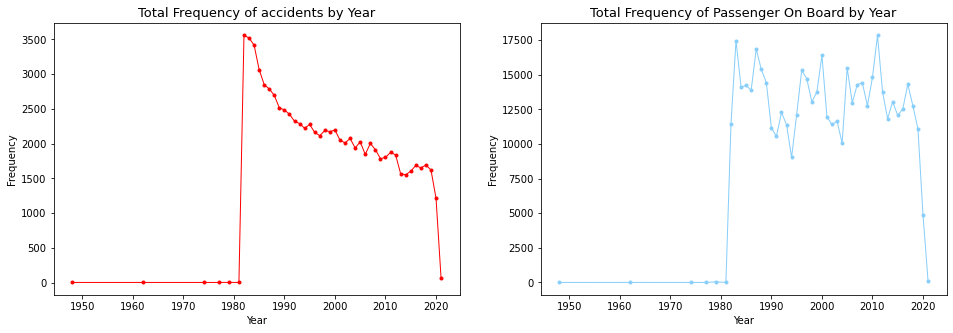

In [81]:
plot_1 = df2[['event_year', 'investigation_type']].groupby('event_year').count()
passenger = aircrash_data[['event_year', 'total_aboard']].groupby('event_year').sum()
fig, axes = plt.subplots(1,2,figsize= (16,5))
plt.style.use('ggplot')

axes[0].plot(plot_1, lw = 1, marker = '.', color = 'red')
axes[0].set_xlabel('Year', fontsize = 10)
axes[0].set_ylabel('Frequency', fontsize = 10)
axes[0].set_title('Total Frequency of accidents by Year', loc = 'center', fontsize = 13)

axes[1].plot(passenger, lw = 1, marker = '.', color = 'lightskyblue')
axes[1].set_xlabel('Year', fontsize = 10)
axes[1].set_ylabel('Frequency', fontsize = 10)
axes[1].set_title('Total Frequency of Passenger On Board by Year', loc = 'center', fontsize = 13)
plt.show()

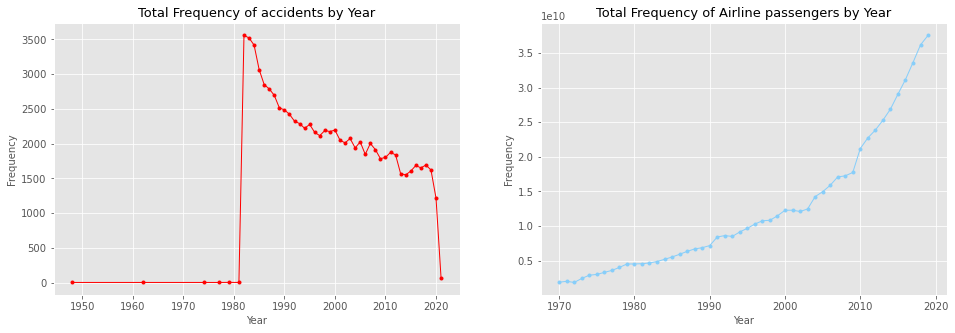

In [82]:
airline_data['event_year'] = pd.to_datetime(airline_data['event_year'])
plot_1 = df2[['event_year', 'investigation_type']].groupby('event_year').count()
passenger = airline_data[['event_year', 'total_passengers']].groupby('event_year').sum()
fig, axes = plt.subplots(1,2,figsize= (16,5))
plt.style.use('ggplot')

axes[0].plot(plot_1, lw = 1, marker = '.', color = 'red')
axes[0].set_xlabel('Year', fontsize = 10)
axes[0].set_ylabel('Frequency', fontsize = 10)
axes[0].set_title('Total Frequency of accidents by Year', loc = 'center', fontsize = 13)

axes[1].plot(passenger, lw = 1, marker = '.', color = 'lightskyblue')
axes[1].set_xlabel('Year', fontsize = 10)
axes[1].set_ylabel('Frequency', fontsize = 10)
axes[1].set_title('Total Frequency of Airline passengers by Year', loc = 'center', fontsize = 13)
plt.show()

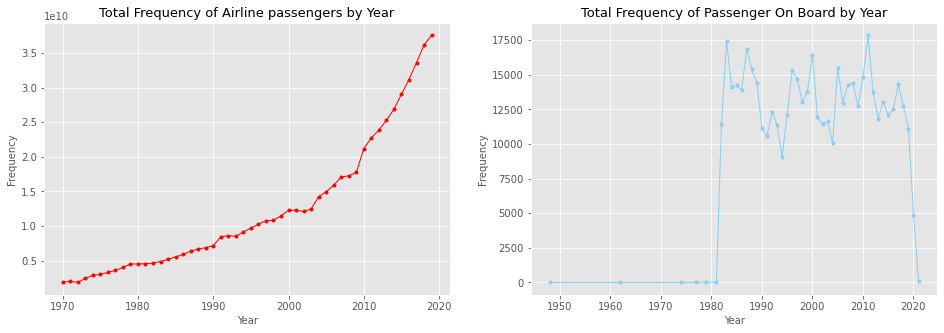

In [179]:
passenger_data = aircrash_data[['event_year', 'total_aboard']].groupby('event_year').sum()
passenger_world = airline_data[['event_year', 'total_passengers']].groupby('event_year').sum()

fig, axes = plt.subplots(1,2,figsize= (16,5)) 

axes[0].plot(passenger_world, lw = 1, marker = '.', color = 'red')
axes[0].set_xlabel('Year', fontsize = 10)
axes[0].set_ylabel('Frequency', fontsize = 10)
axes[0].set_title('Total Frequency of Airline passengers by Year', loc = 'center', fontsize = 13)

axes[1].plot(passenger_data, lw = 1, marker = '.', color = 'lightskyblue')
axes[1].set_xlabel('Year', fontsize = 10)
axes[1].set_ylabel('Frequency', fontsize = 10)
axes[1].set_title('Total Frequency of Passenger On Board by Year', loc = 'center', fontsize = 13)
plt.show()

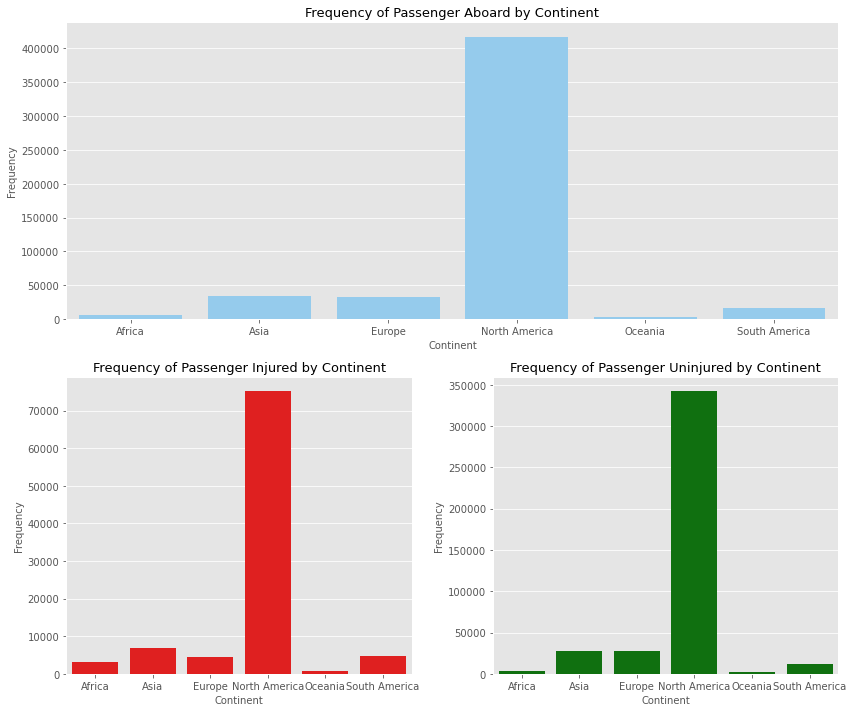

In [83]:
plot_2 = df2[['total_uninjured','total_injured', 'total_aboard','continent']].groupby('continent').sum()
plt.figure(figsize= (12,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan=2)
sns.barplot(plot_2.index, plot_2['total_aboard'],color = 'lightskyblue')
ax1.set_xlabel('Continent', fontsize = 10)
ax1.set_ylabel('Frequency', fontsize = 10)
ax1.set_title('Frequency of Passenger Aboard by Continent', loc = 'center', fontsize = 13)

ax2 = plt.subplot2grid((2,2), (1,0) )
sns.barplot(plot_2.index, plot_2['total_injured'], color = 'red')
ax2.set_xlabel('Continent', fontsize = 10)
ax2.set_ylabel('Frequency', fontsize = 10)
ax2.set_title('Frequency of Passenger Injured by Continent', loc = 'center', fontsize = 13)

ax3 = plt.subplot2grid((2,2), (1,1) )
sns.barplot(plot_2.index, plot_2['total_uninjured'], color = 'green')
ax3.set_xlabel('Continent', fontsize = 10)
ax3.set_ylabel('Frequency', fontsize = 10)
ax3.set_title('Frequency of Passenger Uninjured by Continent', loc = 'center', fontsize = 13)

plt.tight_layout()

In [84]:
def plot_bar_pie_chart(data = None, column = None, bar_title = None, pie_title = None ):
    fig, axes = plt.subplots(1,2,figsize = (14,7))
    c = ['tab:brown', 'yellowgreen', 'lightskyblue', 'teal', 'magenta', 'slategrey']
    colors = {i:j for i, j in zip(data.index , c)}
    axes[0].axis('equal')
    axes[0].pie( data[column], labels = data.index, colors = [colors[i] for i in data.index], autopct = '%1.1f%%')
    axes[0].set_title(pie_title, loc = 'center', fontsize = 13)

    plots = axes[1].bar(data.index, data[column], color = [colors[i] for i in data.index])
    for bar in plots.patches:

      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        axes[1].annotate(format(bar.get_height(), '.1f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
    axes[1].set_xlabel('Continent', fontsize = 10)
    axes[1].set_ylabel('Frequency', fontsize = 10)
    axes[1].set_title(bar_title, loc = 'center', fontsize = 13)
    plt.tight_layout()
    plt.show()

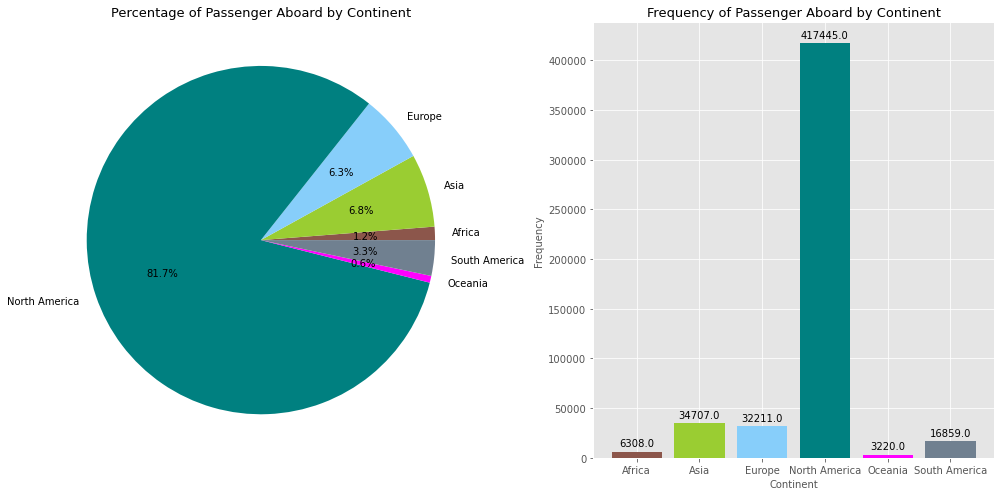

In [85]:
plot_bar_pie_chart(data = plot_2, column = 'total_aboard', pie_title = 'Percentage of Passenger Aboard by Continent',
                      bar_title = 'Frequency of Passenger Aboard by Continent')

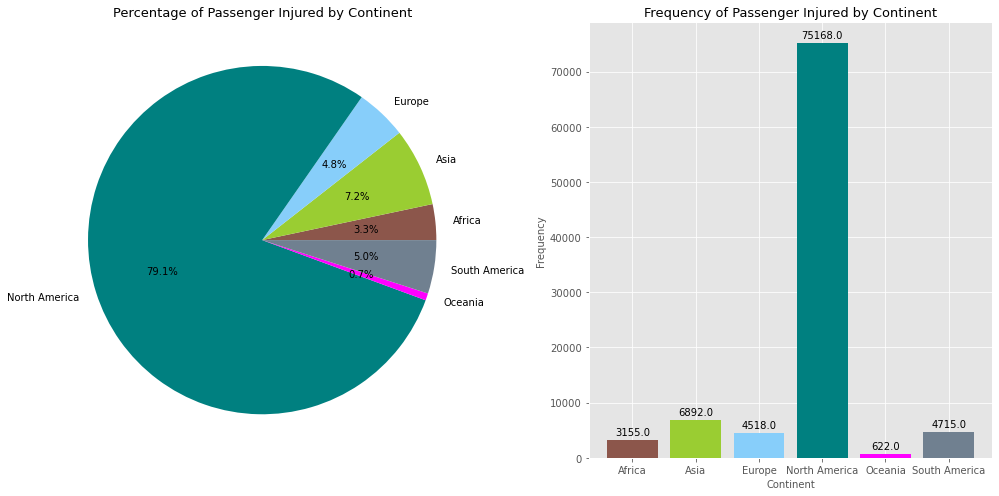

In [86]:
plot_bar_pie_chart(data = plot_2, column = 'total_injured', pie_title = 'Percentage of Passenger Injured by Continent',
                      bar_title = 'Frequency of Passenger Injured by Continent')

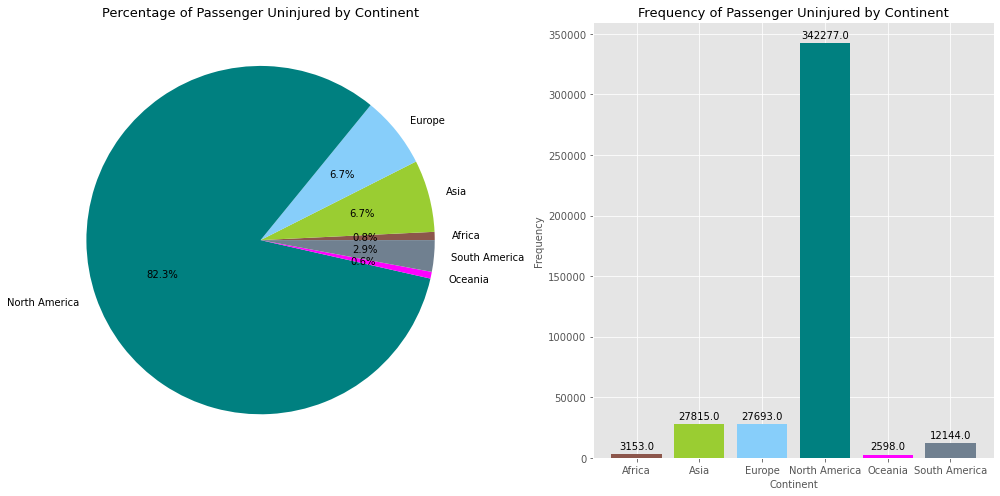

In [87]:
plot_bar_pie_chart(data = plot_2, column = 'total_uninjured', pie_title = 'Percentage of Passenger Uninjured by Continent',
                      bar_title = 'Frequency of Passenger Uninjured by Continent')

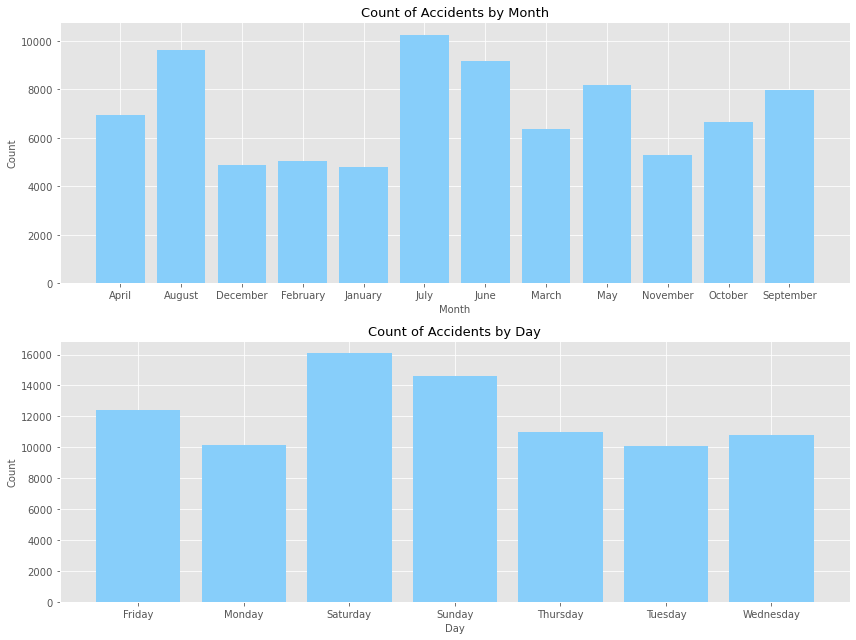

In [88]:
month_group = df2[['event_month', 'investigation_type']].groupby('event_month').count()
day_group = df2[['event_day', 'investigation_type']].groupby('event_day').count()
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1,figsize= (12,9))

axes[0].bar(month_group.index, month_group['investigation_type'], color = 'lightskyblue')
axes[0].set_xlabel('Month', fontsize = 10)
axes[0].set_ylabel('Count', fontsize = 10)
axes[0].set_title('Count of Accidents by Month', loc = 'center', fontsize = 13)

axes[1].bar(day_group.index, day_group['investigation_type'], color = 'lightskyblue')
axes[1].set_xlabel('Day', fontsize = 10)
axes[1].set_ylabel('Count', fontsize = 10)
axes[1].set_title('Count of Accidents by Day', loc = 'center', fontsize = 13)

plt.tight_layout()

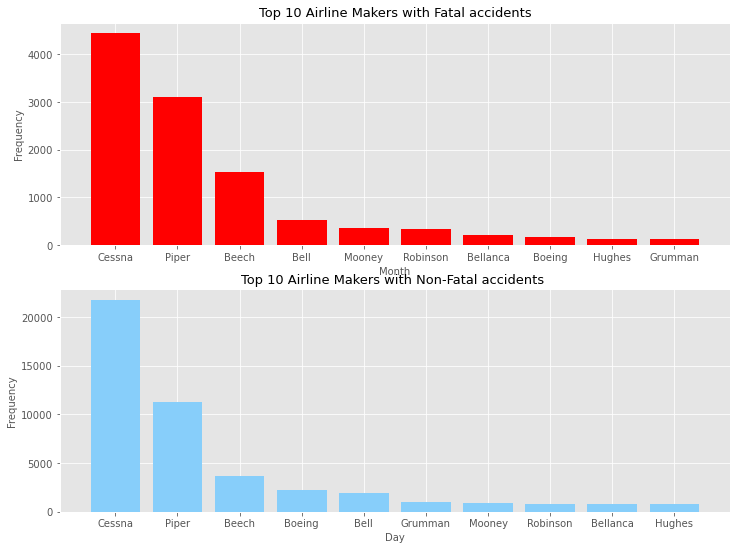

In [89]:
plot_3 = df2[['make', 'injury_severity', 'investigation_type']].groupby(['make', 'injury_severity']).count().sort_values('investigation_type', ascending = False)
plot_3.reset_index(inplace = True)
fatal_group = plot_3[plot_3.injury_severity == 'Fatal'][['make', 'investigation_type']].head(10)
non_fatal_group = plot_3[plot_3.injury_severity == 'Non-Fatal'][['make', 'investigation_type']].head(10)
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1,figsize= (12,9))

axes[0].bar(fatal_group.make, fatal_group['investigation_type'], color = 'red')
axes[0].set_xlabel('Month', fontsize = 10)
axes[0].set_ylabel('Frequency', fontsize = 10)
axes[0].set_title('Top 10 Airline Makers with Fatal accidents', loc = 'center', fontsize = 13)

axes[1].bar(non_fatal_group.make, non_fatal_group['investigation_type'], color = 'lightskyblue')
axes[1].set_xlabel('Day', fontsize = 10)
axes[1].set_ylabel('Frequency', fontsize = 10)
axes[1].set_title('Top 10 Airline Makers with Non-Fatal accidents ', loc = 'center', fontsize = 13)

plt.show()

                           investigation_type
purpose_of_flight                            
Personal                                47706
Unknown                                 11746
Instructional                           10224
Aerial Application                       4599
Business                                 3949
Positioning                              1562
Other Work Use                           1185
Ferry                                     770
Aerial Observation                        730
Public Aircraft                           706
Executive/corporate                       529
Others                                    442
Flight Test                               379
Skydiving                                 177
Air Race/show                             166
External Load                             108
Public Aircraft - Federal                 100


Text(0.5, 1.0, 'Frequency of Accidents by Passenger Purpose of Flight')

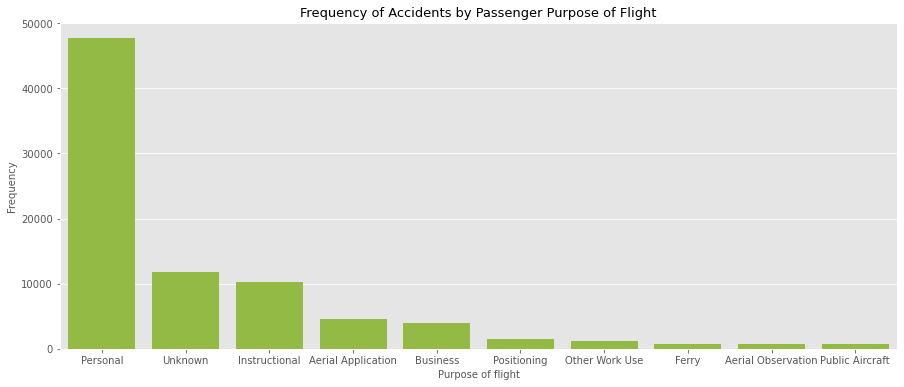

In [90]:
plot_4 = df2[['purpose_of_flight', 'investigation_type']].groupby('purpose_of_flight').count().sort_values(by = 'investigation_type',ascending = False).head(10)
plt.figure(figsize = (15,6))
sns.barplot(plot_4.index, plot_4['investigation_type'], color = 'yellowgreen')
plt.xlabel('Purpose of flight', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
print(df2[['purpose_of_flight', 'investigation_type']].groupby('purpose_of_flight').count().sort_values(by = 'investigation_type',ascending = False).head(20))
plt.title('Frequency of Accidents by Passenger Purpose of Flight', loc = 'center', fontsize = 13)

                       investigation_type
broad_phase_of_flight                    
Landing                             20782
Takeoff                             16338
Cruise                              11027
Maneuvering                         10364
Approach                             8154
Unknown                              8119
Taxi                                 2477
Climb                                2353
Descent                              2294
Go-around                            1703
Standing                             1303
Other                                 164


Text(0.5, 1.0, 'Frequency of Accidents by Phase of Flight')

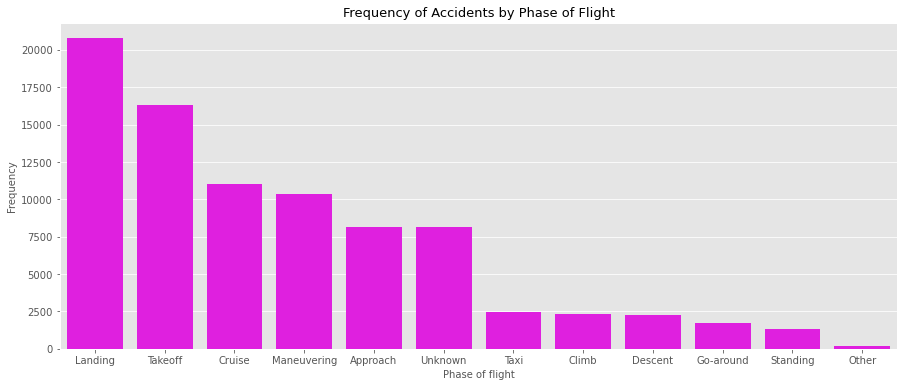

In [178]:
plot_5 = df2[['broad_phase_of_flight', 'investigation_type']].groupby('broad_phase_of_flight').count().sort_values(by = 'investigation_type',ascending = False).head(12)
plt.figure(figsize = (15,6))
sns.barplot(plot_5.index, plot_5['investigation_type'], color = 'magenta')
plt.xlabel('Phase of flight', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
print(df2[['broad_phase_of_flight', 'investigation_type']].groupby('broad_phase_of_flight').count().sort_values(by = 'investigation_type',ascending = False).head(20))
plt.title('Frequency of Accidents by Phase of Flight', loc = 'center', fontsize = 13)

In [91]:
airline_data.head()

,indicator_name,country_name,country_code,indicator_code,event_year,total_passengers
2661,"Air transport, passengers carried",Africa Eastern and Southern,AFE,IS.AIR.PSGR,1970-01-01,3418300.0
2662,"Air transport, passengers carried",Afghanistan,AFG,IS.AIR.PSGR,1970-01-01,84700.0
2663,"Air transport, passengers carried",Africa Western and Central,AFW,IS.AIR.PSGR,1970-01-01,1167000.0
2667,"Air transport, passengers carried",Arab World,ARB,IS.AIR.PSGR,1970-01-01,4209300.0
2669,"Air transport, passengers carried",Argentina,ARG,IS.AIR.PSGR,1970-01-01,2332000.0


In [92]:
countries_code.head()

,country_name,alpha_2,country_code,country_number_code,iso_3166_2,region,sub_region,intermediate_region,region_code,sub_region_code,intermediate_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [93]:
countries_code[countries_code.country_code.str.startswith('AF')]

,country_name,alpha_2,country_code,country_number_code,iso_3166_2,region,sub_region,intermediate_region,region_code,sub_region_code,intermediate_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN


In [94]:
new_df = airline_data[airline_data['country_code'].isin(countries_code['country_code'])]

In [95]:
len(new_df)

7311

In [96]:
df_3 = new_df[['country_name', 'country_code', 'total_passengers']].groupby(['country_name', 'country_code']).sum()
df_3.reset_index(inplace = True)
df_3['total_passengers'] = df_3['total_passengers']/ 1000000
df_3.rename({'total_passengers': 'Total Passengers (in Million)'}, axis =1, inplace = True)
df_3.head()

,country_name,country_code,Total Passengers (in Million)
0,Afghanistan,AFG,22.837722
1,Albania,ALB,6.372713
2,Algeria,DZA,167.017432
3,American Samoa,ASM,0.305695
4,Angola,AGO,28.922934


In [97]:
len(df_3)

185

In [100]:
pop_data =  pop_data[['Country Name', 'Country Code', '2020']]
pop_data

,Country Name,Country Code,2020
0,Aruba,ABW,106766.0
1,Africa Eastern and Southern,AFE,677243299.0
2,Afghanistan,AFG,38928341.0
3,Africa Western and Central,AFW,458803476.0
4,Angola,AGO,32866268.0
...,...,...,...
261,Kosovo,XKX,1775378.0
262,"Yemen, Rep.",YEM,29825968.0
263,South Africa,ZAF,59308690.0
264,Zambia,ZMB,18383956.0


In [103]:
big_data = df_3.set_index('country_code').join(pop_data[['Country Code', '2020']].set_index('Country Code'))
big_data.rename( {'2020': 'Population'}, axis =1,inplace = True)

In [107]:
big_data = big_data[big_data.Population.notnull()]

In [110]:
big_data.reset_index(inplace = True)

In [111]:
big_data.head()

,country_code,country_name,Total Passengers (in Million),Population
0,AFG,Afghanistan,22.837722,38928341.0
1,ALB,Albania,6.372713,2837743.0
2,DZA,Algeria,167.017432,43851043.0
3,ASM,American Samoa,0.305695,55197.0
4,AGO,Angola,28.922934,32866268.0


In [138]:
big_data['country_name'] = big_data['country_name'].replace({ "Bahamas, The": "Bahamas",
"Brunei Darussalam" : "Brunei",
 'Burkina Faso': 'Burkina', "Korea, Dem. People's Rep.": 'North Korea',
  'Egypt, Arab Rep.': 'Egypt', 'Iran, Islamic Rep.': 'Iran', "Gambia, The": "Gambia",
  "Lao PDR": 'Laos', 'Réunion':'Reunion', 'Russian Federation': 'Russia',
  'Korea, Rep.': 'South Korea', 
  'Hong Kong SAR, China':'Hong Kong', 'Cabo Verde': 'Cape Verde', 
  'Venezuela, RB': 'Venezuela', 'Yemen, Rep.': 'Yemen', 'Kyrgyz Republic':'Kyrgyzstan', 'Slovak Republic':'Slovakia', 
                'Syrian Arab Republic':'Syria', 'Congo, Dem. Rep.':'Congo, Democratic Republic of', 'Congo, Rep.': 'Congo'})

In [143]:
new_data = big_data.set_index('country_name').join(continent.set_index('Country'))
new_data.reset_index(inplace = True)
new_data.head()

,country_name,country_code,Total Passengers (in Million),Population,Continent
0,Afghanistan,AFG,22.837722,38928341.0,Asia
1,Albania,ALB,6.372713,2837743.0,Europe
2,Algeria,DZA,167.017432,43851043.0,Africa
3,American Samoa,ASM,0.305695,55197.0,Oceania
4,Angola,AGO,28.922934,32866268.0,Africa


In [144]:
new_data = new_data[new_data.Continent.notnull()]

In [115]:
data = dict(type = 'choropleth',
    locations = df_3['country_code'],
    z = df_3['Total Passengers (in Million)'],
    text = df_3['country_name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Population (Million)'
)

layout = dict(title = 'Total Population of Passenger that travelled by Airline (1970-2020)',
              geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

choromap = go.Figure(data = [data], layout = layout)

In [116]:
iplot(choromap)

In [154]:
us_df

,state_code,country,investigation_type,location,injury_severity,aircraft_damage,make,engine_type,purpose_of_flight,total_fatal_injuries,...,report_status,event_month,event_day,event_year,event_week_number,total_injured,total_aboard,country_code,Continent,US_State
0,AK,United States,Accident,"TYONEK, AK",Non-Fatal,Substantial,Maule,Reciprocating,Personal,0.0,...,Probable Cause,February,Saturday,2021,2,2.0,2.0,USA,North America,Alaska
1,AK,United States,Accident,"ANCHORAGE, AK",Non-Fatal,Substantial,Piper,Reciprocating,Instructional,0.0,...,Probable Cause,January,Monday,2021,4,0.0,3.0,USA,North America,Alaska
2,AK,United States,Accident,"HOPE, AK",Non-Fatal,Substantial,Cessna,Reciprocating,Instructional,0.0,...,Probable Cause,December,Thursday,2020,5,0.0,2.0,USA,North America,Alaska
3,AK,United States,Accident,"JUNEAU, AK",Non-Fatal,Substantial,Piper,Reciprocating,Personal,0.0,...,Probable Cause,December,Thursday,2020,1,0.0,1.0,USA,North America,Alaska
4,AK,United States,Accident,"ANCHORAGE, AK",Non-Fatal,Substantial,Cessna,Reciprocating,Instructional,0.0,...,Probable Cause,October,Tuesday,2020,3,0.0,2.0,USA,North America,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79937,WY,United States,Accident,"NEAR GILLETE, WY",Non-Fatal,Substantial,Cessna,Reciprocating,Unknown,0.0,...,Probable Cause,January,Friday,1982,5,0.0,2.0,USA,North America,Wyoming
79938,WY,United States,Accident,"36 SW LARAMIE, WY",Non-Fatal,Substantial,Bell/textron,Turbo Shaft,Personal,0.0,...,Probable Cause,January,Saturday,1982,4,0.0,2.0,USA,North America,Wyoming
79939,WY,United States,Accident,"BONDURANT, WY",Non-Fatal,Substantial,Hughes,Reciprocating,Unknown,0.0,...,Probable Cause,January,Wednesday,1982,3,0.0,2.0,USA,North America,Wyoming
79940,WY,United States,Accident,"RIVERTON, WY",Fatal,Destroyed,Cessna,Reciprocating,Personal,4.0,...,Probable Cause,January,Monday,1982,2,6.0,6.0,USA,North America,Wyoming


In [158]:
dict(scope = 'usa')

{'scope': 'usa'}

In [156]:
us_group = us_df[['US_State', 'investigation_type', 'state_code']].groupby(['US_State', 'state_code']).count()
us_group.reset_index(inplace = True)
us_group.head()

,US_State,state_code,investigation_type
0,Alabama,AL,1125
1,Alaska,AK,5508
2,Arizona,AZ,2746
3,Arkansas,AR,1481
4,Atlantic ocean,AO,13


In [162]:
data = dict(type = 'choropleth',
    locations = us_group['state_code'],
    locationmode = 'USA-states',
    z = us_group['investigation_type'],
    text = us_group['US_State'],
    colorscale = 'viridis',
    colorbar_title = 'Frequency'
)

layout = dict(title = 'Frequency of Airline Accidents in US States (1980-2020)',
              geo=dict(scope= 'usa'
))

choromap_USA = go.Figure(data = [data], layout = layout)

In [163]:
iplot(choromap_USA)

In [180]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd


app = dash.Dash(__name__)


fig = px.scatter(new_data, x='Total Passengers (in Million)', y="Population",
                 size="Population", color="Continent", hover_name="country_name",
                 log_x=True, size_max=60)

app.layout = html.Div([
    dcc.Graph(
        id='Population-vs-Total-Airline-Passengers',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [164]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [165]:
df2.make.value_counts()

Cessna                      26245
Piper                       14355
Beech                        5197
Bell                         2517
Boeing                       2483
                            ...  
J And J                         1
Wichawk                         1
Fones                           1
George                          1
Arado-flugzeugwerke Gmbh        1
Name: make, Length: 7253, dtype: int64

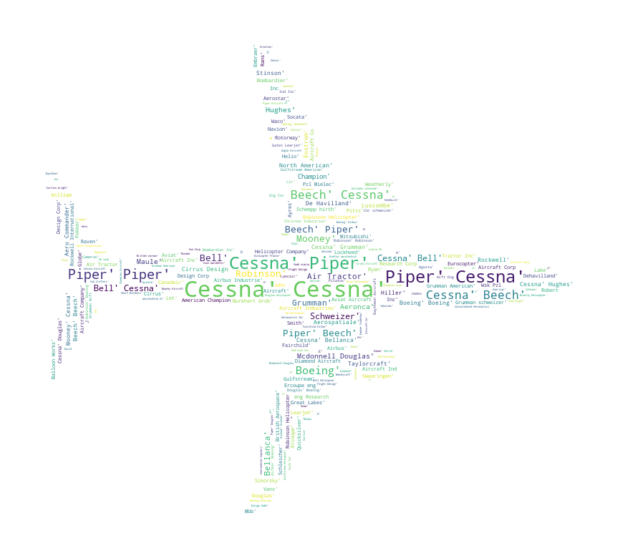

In [171]:
text = str(df2.make.tolist())
# Create airplane mask
airplane_mask = np.array(Image.open("./Data/Aeroplane-PNG.png"))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['Unknown'])


# Create a word cloud image
wc = WordCloud(background_color="white", max_words=500, mask=airplane_mask,
               stopwords=stopwords)

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("./Data/Airplane_mask.png")

# show
plt.figure(figsize=[12,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
This is beautiful work! However, you may want to consider to to try to add another or adjust:

the column plot of #accidents by hour, because most accidents probably occur close to take-off and landing. Thus you will have far more flights in the early morning and evenings, as most long-haul flights start/end at those times.
the fatal (and other plots) incident by airline, to account for fleet-size and/or total flights.


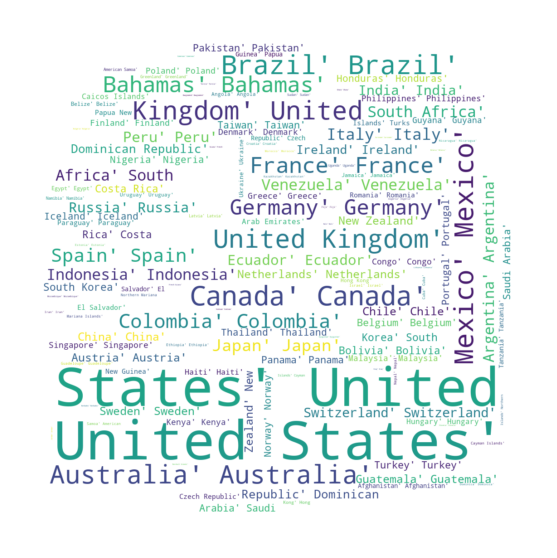

In [184]:
globe_text = str(df2.country.tolist())
# Create airplane mask
globe_mask = np.array(Image.open("./Data/Globe.png"))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['Unknown'])


# Create a word cloud image
wc = WordCloud(background_color="white", max_words=2000, mask=globe_mask,
               stopwords=stopwords)

# Generate a wordcloud
wc.generate(globe_text)

# store to file
wc.to_file("./Data/Global_mask.png")

# show
plt.figure(figsize=[12,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<p> Inferences </p>
<p>It seems like 1970- 1990s were not the best year in history of Airline. More about accidents in this years can be found on https://en.wikipedia.org/wiki/Aviation_safety </p>
<p> Most of accidents happened during Landing and Take-offs. Thus adequate orientations and trainings are encouraged to be provided to the pilots and operator from the OSHA. </p>
<p> It was shown a lot of passengers were boarded on Ceesna and Piper aircraft makers and as a result they have high number of fatalities. https://www.cliffordlaw.com/aviation-accidents-and-incidents </p>
